In [3]:
from dipy.io.image import load_nifti
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
import numpy as np
import os
import matplotlib.pyplot as plt

base_dir = "/storage/users/arihant"
base_dir_7t = [base_dir + "/HCP_7T/" + i   for i in os.listdir(base_dir + "/HCP_7T") if len(i) == 6]
base_dir_3t = [base_dir + "/HCP_3T/" + i   for i in os.listdir(base_dir + "/HCP_3T") if len(i) == 6]

path_7t = {}
path_3t = {}


for i in base_dir_7t:
    path_7t[i[-6:]] = {"3d_scan" : i + "/T1w/T1w_acpc_dc_restore_1.05.nii.gz" ,"data" : i + "/T1w/Diffusion_7T/data.nii.gz" 
                       , "bvals" : i + "/T1w/Diffusion_7T/bvals" , "bvecs" : i + "/T1w/Diffusion_7T/bvecs"
                      , "brain_mask" : i + "/T1w/Diffusion_7T/nodif_brain_mask.nii.gz"
                      , "grad_dev" : i + "/T1w/Diffusion_7T/grad_dev.nii.gz"}
for i in base_dir_3t:
    path_3t[i[-6:]] = {"3d_scan" : i + "/T1w/T1w_acpc_dc_restore_1.25.nii.gz" , "data" : i + "/T1w/Diffusion/data.nii.gz" 
                       , "bvals" : i + "/T1w/Diffusion/bvals" , "bvecs" : i + "/T1w/Diffusion/bvecs"
                       , "brain_mask" : i + "/T1w/Diffusion/nodif_brain_mask.nii.gz"
                      , "grad_dev" : i + "/T1w/Diffusion/grad_dev.nii.gz"}
path = {'3T': path_3t, "7T": path_7t}
p = list(path_7t.keys())
q = list(path_3t.keys())
common = list(set(p) & set(q))


print("number of common Subjects ",len(common))
def load_hcp(id_load,res,ret_img = False):
    load_from = path[res][id_load]
    if ret_img:
        data , affine, img = load_nifti(load_from["data"], return_img=ret_img)
    else:
        data , affine= load_nifti(load_from["data"], return_img=ret_img)
    mask,affine = load_nifti(load_from["brain_mask"], return_img=ret_img)
    scan, affine = load_nifti(load_from["3d_scan"], return_img=False)
    
    bvals, bvecs = read_bvals_bvecs(load_from['bvals'], load_from['bvecs'])
    gtab = gradient_table(bvals, bvecs)
    
    return data,mask,scan,gtab

def mean_volume(data,gtab,b):
    if b not in gtab.bvals:
        print("invalid b value")
        return None
    else:
        return np.mean(data , axis = 3 ,where = gtab.bvals == b)

number of common Subjects  171


In [4]:
data,mask,scan,gtab = load_hcp('130114','3T')

In [5]:
data_mean = mean_volume(data,gtab,5)

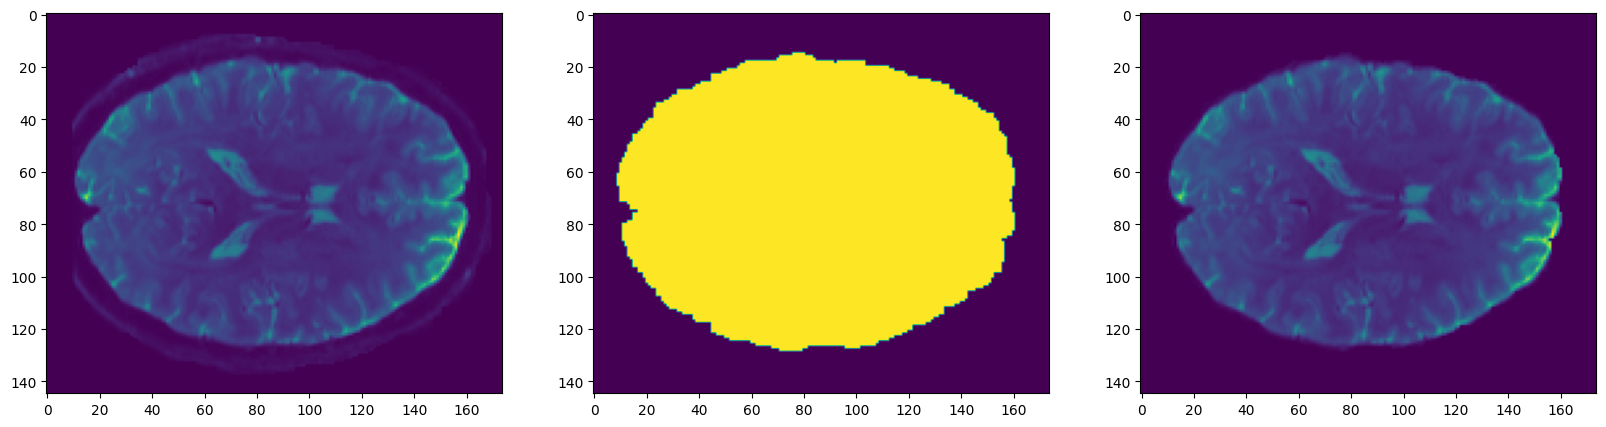

In [6]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_mean[:,:,i])
axis[1].imshow(mask[:,:,i])
axis[2].imshow(mask[:,:,i]*data_mean[:,:,i])

In [7]:
len(gtab.bvals)

288

In [8]:
gtab.bvecs[np.where(gtab.bvals == 5)[0]]

array([[ 0.575135, -0.610426,  0.544609],
       [ 0.575461, -0.610839,  0.543803],
       [ 0.575841, -0.609722,  0.544653],
       [ 0.575902, -0.609521,  0.544813],
       [ 0.576646, -0.608674,  0.544972],
       [ 0.577103, -0.608176,  0.545045],
       [ 0.579194, -0.603038,  0.548525],
       [ 0.579121, -0.603044,  0.548596],
       [ 0.579524, -0.602712,  0.548535],
       [ 0.579592, -0.602007,  0.549236],
       [ 0.579601, -0.601438,  0.54985 ],
       [ 0.579498, -0.601312,  0.550097],
       [ 0.580036, -0.603047,  0.547625],
       [ 0.580736, -0.602666,  0.547302],
       [ 0.580301, -0.602157,  0.548323],
       [ 0.580015, -0.601874,  0.548937],
       [ 0.580447, -0.601403,  0.548997],
       [ 0.580523, -0.601034,  0.549319]])

<IPython.core.display.Javascript object>


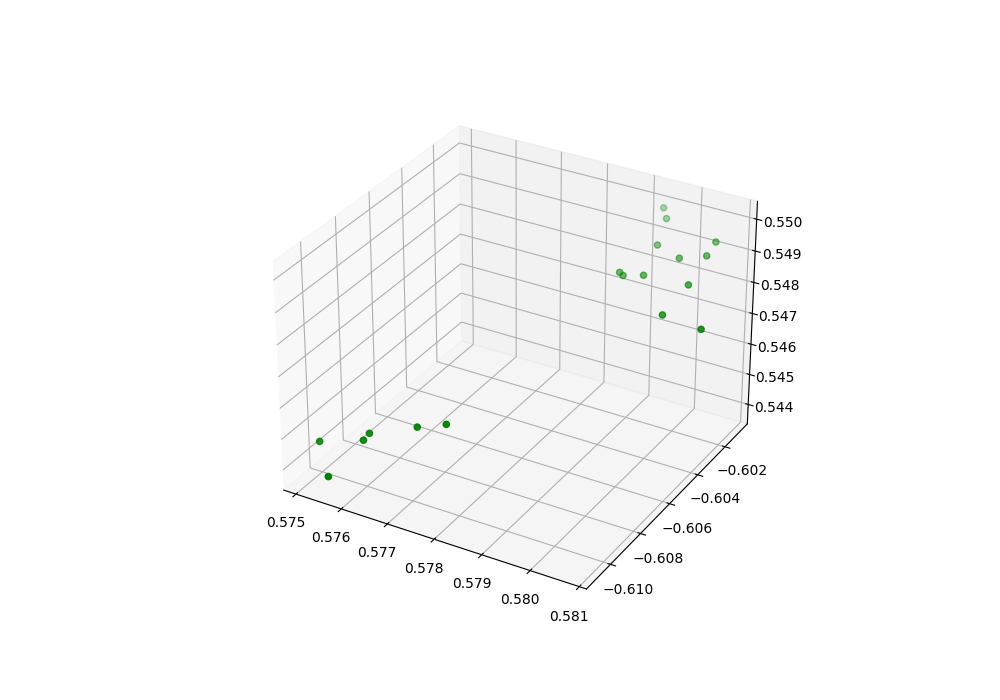

In [13]:
%matplotlib notebook
# import plotly.graph_objects as go
# import numpy as np

x , y, z = gtab.bvecs[np.where(gtab.bvals == 5)[0]][:,0],gtab.bvecs[np.where(gtab.bvals == 5)[0]][:,1],gtab.bvecs[np.where(gtab.bvals == 5)[0]][:,2]

# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
#                                    mode='markers')])
# fig.show()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")

<IPython.core.display.Javascript object>


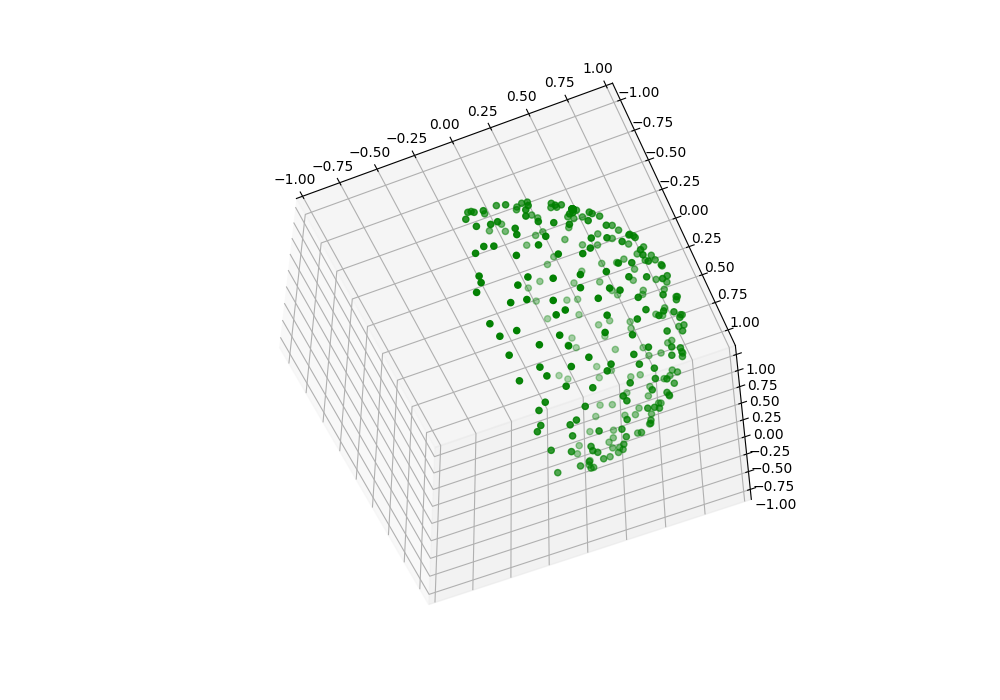

In [10]:

import plotly.graph_objects as go
import numpy as np

x , y, z = gtab.bvecs[:,0],gtab.bvecs[:,1],gtab.bvecs[:,2]

# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
#                                    mode='markers')])
# fig.show()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlim(-1,1)
# Creating plot
ax.scatter3D(x, y, z, color = "green")


In [11]:
data_mean.shape

(145, 174, 145)